In [1]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [3]:
from textblob import TextBlob
import json
import os
import re
import csv
from csv import DictWriter
import urllib
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from nltk.corpus import sentiwordnet as swn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pytz

In [11]:
file = open(r"C:\Users\rupa\Documents\Rupa\UCLA\Q2\219\LSDM-projects\Project5\ECE219_tweet_data\tweets_#gohawks.txt", encoding = 'utf8')
l = []
for line in file:
    data = json.loads(line)
    l.append([data['tweet']['user']['location'], data['citation_date'], data['firstpost_date'], data['tweet']['text']])
df = pd.DataFrame(l, columns=['location', 'citation_date', 'firstpost_date', 'tweet'])

In [9]:
import json
import csv
files= [r"C:\Users\rupa\Documents\Rupa\UCLA\Q2\219\LSDM-projects\Project5\ECE219_tweet_data\tweets_#gohawks.txt"] # all the file name in the folder
f = open(files[0], encoding="utf-8")
# open a file for writing
csv_file = open('gohawks.csv', 'w')
# create the csv writer object
csvwriter = csv.writer(csv_file)
count = 0
for line in f:
    data = json.loads(line)
    dict1={}
    dict1['location'] = data['tweet']['user']['location']
    dict1['citation_date'] = data['citation_date']
    dict1['firstpost_date'] = data['firstpost_date']
    dict1['tweet'] = data['tweet']['text']
    if count==0:
        csvwriter.writerow(dict1.keys())
        count+=1

    csvwriter.writerow(dict1.values())

UnicodeEncodeError: 'charmap' codec can't encode characters in position 94-95: character maps to <undefined>

In [7]:
df = pd.read_json(open(files[0], encoding="utf-8"), orient='split', lines = True)

AttributeError: 'list' object has no attribute 'items'

In [3]:
df=pd.read_csv("gohawks.csv")

In [12]:
df.iloc[5]

location                                            McChord AFB, WA
citation_date                                            1421468176
firstpost_date                                           1420042851
tweet             @FiveThirtyEight #GoHawks. Keep your eyes on t...
Name: 5, dtype: object

In [13]:
pst_tz = pytz.timezone('US/Pacific')

In [14]:
pt='Redmund, WA|Seattle, WA|Kirkland, WA|Seattle|Washington|WA$|Kirkland,'
pattern_pt ='MA,Boston|MA$|Massachusetts'

In [15]:
df=df[df['location'].str.contains(pt, na = False)]

In [16]:
df.head()

,location,citation_date,firstpost_date,tweet
1,"Redmond, WA",1421259536,1419864008,twelfth dogs are ready! #gohawks #dogslife htt...
2,Seattle,1421468519,1419881240,"""Oh no big deal, just NFC West Champs and the ..."
5,"McChord AFB, WA",1421468176,1420042851,@FiveThirtyEight #GoHawks. Keep your eyes on t...
6,Washington state,1421468144,1420052779,One of my Favorite Hawk logos that went around...
11,Greater Seattle Area,1421467885,1420218026,If they pass on you... pass on them #GoHawks 😁...


In [22]:
sens=[]
for row in df.itertuples(2):
    date = row.citation_date
    dt = datetime.datetime.fromtimestamp(date, pst_tz)
    day = dt.day
    month = dt.month
    time = dt.hour
    if day==1 and month==2 and time>=18:
        text = row.tweet            
        text = text.replace("@","")
        text = text.replace("\n", " ")
        text = re.sub(r'[^\x00-\x7F]+',' ', text)
        blob = TextBlob(text)
        tweet_spt = blob.split(" ")
        words=[]
        for word in tweet_spt:
            if word.startswith("http") or word.startswith("#"):
                pass
            else:
                words.append(word)
        var=""
        for word in words:
            var = var + word + " "  
        var.strip()
        sens.append(var)
print(sens)                        


['If a "thug" has a 4.2 GPA,1400 SAT score, and a masters degree from Stanford, more kids should be thugs. ', 'Thanks so much for including me AledaMichels! Hope u have a great weekend.  :)  (DreBeltrami expatsinbiz) ', 'Team picture at the stadium! ', 'Out in Woodinville, Benjamin Smith asks, "U Mad Bro?" ', 'This is so creative!  Stop motion BeastQuake. MoneyLynch MommaLynch24   ', 'You guys remember that time we were in a Super Bowl commercial? ', 'If a "thug" has a 4.2 GPA,1400 SAT score, and a masters degree from Stanford, more kids should be thugs. ', "How is a thug for having a clean record but Max Hall deserves 'empathy' after an arrest? ", 'at BillWixey IanKJR WSUCougars ', 'thinks the Washington Redskins name is blatantly racist. RT if you agree. ', 'We feel you and hear you We are so grateful! ', 'Kessel household on Super Bowl Sunday. ', '2nd quarter time 12s!! ', 'Carra23 I invite you to watch a football match at Seattle you will change your mind ', '= breakout star. ', '3

In [33]:
def sentiFunc(line):
    stop_words = set(stopwords.words('english'))
    tks = word_tokenize(line)
    filtered_sent = [w for w in tks if not w in stop_words]
    p=n=0
    for word in filtered_sent:
        print(word)
        if len(list(swn.senti_synsets(word))) > 0:
            print(swn.senti_synsets(word))
            ss_set = list(swn.senti_synsets(word))[0]
            if ss_set:
                p = p+ss_set.pos_score()
                n = n+ss_set.neg_score()

    return p, n

In [34]:
list(swn.senti_synsets('if'))

[]

If a "thug" has a 4.2 GPA,1400 SAT score, and a masters degree from Stanford, more kids should be thugs. 
If
``
thug
''
4.2
GPA,1400
SAT
score
,
masters
degree
Stanford
,
kids
thugs
.
Thanks so much for including me AledaMichels! Hope u have a great weekend.  :)  (DreBeltrami expatsinbiz) 
Thanks
much
including
AledaMichels
!
Hope
u
great
weekend
.
:
)
(
DreBeltrami
expatsinbiz
)
Team picture at the stadium! 
Team
picture
stadium
!
Out in Woodinville, Benjamin Smith asks, "U Mad Bro?" 
Out
Woodinville
,
Benjamin
Smith
asks
,
``
U
Mad
Bro
?
''
This is so creative!  Stop motion BeastQuake. MoneyLynch MommaLynch24   
This
creative
!
Stop
motion
BeastQuake
.
MoneyLynch
MommaLynch24
You guys remember that time we were in a Super Bowl commercial? 
You
guys
remember
time
Super
Bowl
commercial
?
If a "thug" has a 4.2 GPA,1400 SAT score, and a masters degree from Stanford, more kids should be thugs. 
If
``
thug
''
4.2
GPA,1400
SAT
score
,
masters
degree
Stanford
,
kids
thugs
.
How is a thug for

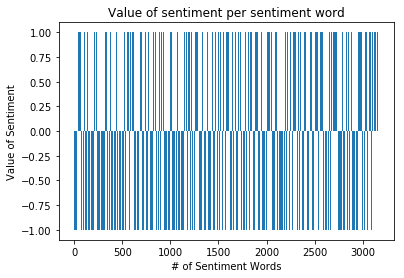

In [35]:
p_c=0
n_c=0
p_val=0
n_val=0
values=[]
count=0
for i in range(0, len(sens)):
    print(sens[i])
    pos, neg = sentiFunc(sens[i])
    if pos > neg:
        p_c+=1
        values.append(1)
    else:
        n_c+=1
        values.append(-1)
plt.bar(range(0, len(values)), values, edgecolor='none')
plt.xlabel("# of Sentiment Words")
plt.ylabel("Value of Sentiment")
plt.title("Value of sentiment per sentiment word")
plt.show()